Generated data matrix X shape: (760, 1024)
Generated labels y shape: (760,)


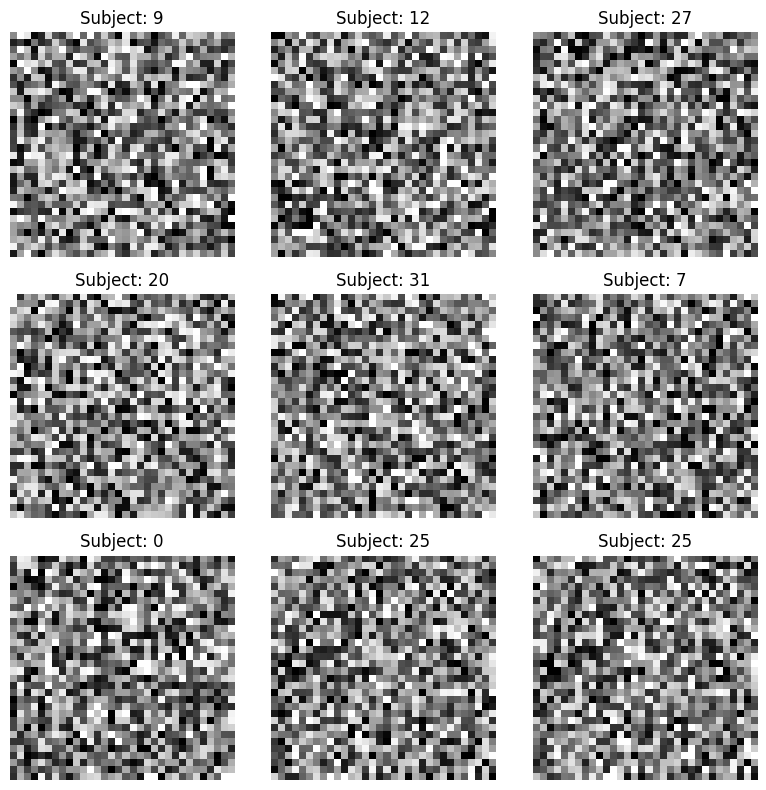

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_simulated_faces(n_subjects=38, n_samples_per_subject=20, img_size=(32, 32), noise_std=0.1, seed=42):
    """
    Generate simulated face data for use in a Fisherfaces method assignment.
    
    Parameters:
    - n_subjects: Number of distinct subjects (classes). The Extended Yale B dataset typically includes 38 subjects.
    - n_samples_per_subject: Number of face images per subject.
    - img_size: Tuple specifying the image dimensions (height, width). Default is (32,32).
    - noise_std: Standard deviation for Gaussian noise added to each subject's mean.
    - seed: Random seed for reproducibility.
    
    Returns:
    - X: A numpy array of shape (total_samples, n_features) containing the simulated faces.
    - y: A numpy array of shape (total_samples,) containing integer labels (0 to n_subjects-1).
    """
    np.random.seed(seed)  # for reproducibility
    n_features = img_size[0] * img_size[1]
    total_samples = n_subjects * n_samples_per_subject
    
    # Initialize arrays for the simulated data and labels.
    X = np.zeros((total_samples, n_features))
    y = np.zeros(total_samples, dtype=int)
    
    # Each subject gets a baseline "mean face" generated randomly.
    subject_means = np.random.rand(n_subjects, n_features)
    
    sample_index = 0
    for subject in range(n_subjects):
        for _ in range(n_samples_per_subject):
            # Create a simulated image by perturbing the subject's mean face with Gaussian noise.
            sample = subject_means[subject] + np.random.normal(0, noise_std, n_features)
            # Clip the values to the range [0, 1] to simulate normalized pixel intensities.
            sample = np.clip(sample, 0, 1)
            X[sample_index, :] = sample
            y[sample_index] = subject
            sample_index += 1
            
    return X, y

# Generate the simulated face dataset.
X, y = generate_simulated_faces(n_subjects=38, n_samples_per_subject=20, img_size=(32,32), noise_std=0.1)
print("Generated data matrix X shape:", X.shape)
print("Generated labels y shape:", y.shape)

# Visualize a few random simulated face images.
num_samples_to_show = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes = axes.ravel()
for i in range(num_samples_to_show):
    idx = np.random.choice(len(X))
    # Reshape the flat vector back to the original image dimensions.
    axes[i].imshow(X[idx].reshape(32,32), cmap='gray')
    axes[i].set_title("Subject: " + str(y[idx]))
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [2]:
from scipy.io import savemat
# Save in MATLAB-friendly format
savemat('generated_images.mat', {'images': X.T})       # images shape: (features, samples)
savemat('generated_classes.mat', {'classes': y.reshape(1, -1)})  # classes shape: (1, samples)

print("Saved as 'generated_images.mat' and 'generated_classes.mat'")

Saved as 'generated_images.mat' and 'generated_classes.mat'
